# Mobile Price Range Prediction Using Different Machine Learning Algorithms

In [1]:
#Dataset Loading

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


mobile = pd.read_csv('mobile.csv')

In [3]:
# We are going to explore the details of the dataset


In [4]:
print("Number of rows: ",mobile.shape[0])
print("Number of columns: ",mobile.shape[1])

Number of rows:  2000
Number of columns:  21


In [5]:
mobile.dtypes


battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [6]:
mobile.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [7]:
#Graphical Representation of each attributes

In [8]:

import os
from pathlib import Path

IMAGES_PATH = Path() / "images" / "Data Preprocessing"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

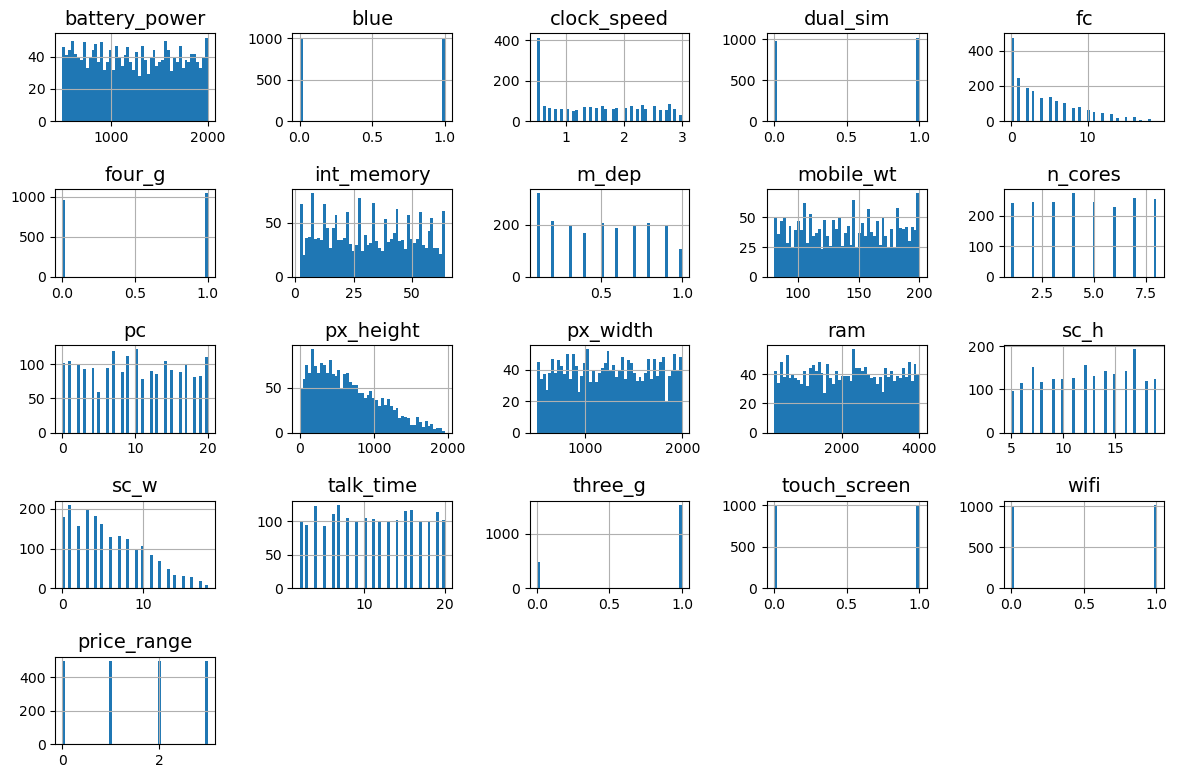

In [9]:

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

mobile.hist(bins=50, figsize=(12, 8))
save_fig("Attr_Hist")  # extra code
plt.show()

In [10]:
#cheking for null values
mobile.isnull()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
mobile.isnull().sum() # we can see there are no null values

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

## Check for Data Consistency

In [12]:
mobile.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [13]:
mobile.battery_power.unique()

array([ 842, 1021,  563, ..., 1139, 1467,  858], dtype=int64)

In [14]:
mobile.clock_speed.unique()

array([2.2, 0.5, 2.5, 1.2, 1.7, 0.6, 2.9, 2.8, 2.1, 1. , 0.9, 1.1, 2.6,
       1.4, 1.6, 2.7, 1.3, 2.3, 2. , 1.8, 3. , 1.5, 1.9, 2.4, 0.8, 0.7])

In [15]:
mobile.ram.unique()

array([2549, 2631, 2603, ..., 2032, 3057, 3919], dtype=int64)

In [16]:
mobile.sc_h.unique()

array([ 9, 17, 11, 16,  8, 13, 19,  5, 14, 18,  7, 10, 12,  6, 15],
      dtype=int64)

In [17]:
mobile.sc_w.unique()

array([ 7,  3,  2,  8,  1, 10,  9,  0, 15, 13,  5, 11,  4, 12,  6, 17, 14,
       16, 18], dtype=int64)

In [18]:
train_data=pd.read_csv('Train.csv')

In [19]:
test_data=pd.read_csv('Test.csv')

In [20]:
test_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1166,1,0.5,0,7,0,59,0.5,80,1,...,437,638,3887,8,6,7,1,0,1,3
1,1776,1,2.1,1,10,0,35,0.1,172,4,...,278,623,1813,16,13,20,1,1,1,1
2,1254,1,1.2,0,2,1,27,0.2,134,2,...,1288,1372,817,14,1,16,1,1,1,0
3,1494,0,1.6,1,4,1,24,0.2,101,1,...,979,1190,3614,15,12,9,1,0,0,3
4,984,1,2.2,1,0,1,39,0.5,119,8,...,56,1931,2013,11,7,16,1,1,0,1


In [21]:
train_data.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1594,586,1,0.6,0,16,1,42,0.3,121,7,...,785,1118,1869,12,2,7,1,1,1,1
1595,1206,0,3.0,1,10,1,30,0.6,127,3,...,1581,1713,1825,7,1,4,1,0,1,2
1596,832,1,0.5,1,1,1,5,0.1,165,5,...,9,1944,3946,12,5,14,1,1,1,3
1597,848,1,2.8,0,1,0,8,0.1,103,7,...,7,1294,436,10,6,15,1,1,1,0
1598,1851,0,2.9,0,0,0,53,0.7,112,6,...,174,1175,2678,6,0,8,1,0,0,2


In [22]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1599 non-null   int64  
 1   blue           1599 non-null   int64  
 2   clock_speed    1599 non-null   float64
 3   dual_sim       1599 non-null   int64  
 4   fc             1599 non-null   int64  
 5   four_g         1599 non-null   int64  
 6   int_memory     1599 non-null   int64  
 7   m_dep          1599 non-null   float64
 8   mobile_wt      1599 non-null   int64  
 9   n_cores        1599 non-null   int64  
 10  pc             1599 non-null   int64  
 11  px_height      1599 non-null   int64  
 12  px_width       1599 non-null   int64  
 13  ram            1599 non-null   int64  
 14  sc_h           1599 non-null   int64  
 15  sc_w           1599 non-null   int64  
 16  talk_time      1599 non-null   int64  
 17  three_g        1599 non-null   int64  
 18  touch_sc

C:\Users\RSCOMBD-01814652488\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price_range', ylabel='count'>

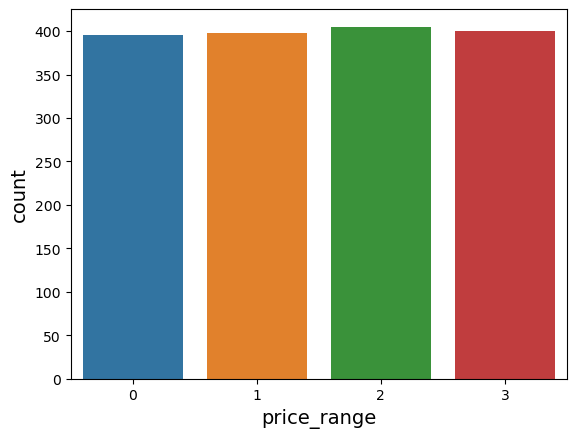

In [23]:
sns.countplot(train_data['price_range'])

In [24]:
train_data.shape, test_data.shape

((1599, 21), (401, 21))

In [25]:
train_data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,...,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,1242.781113,0.481551,1.520513,0.508443,4.292683,0.515947,32.355222,0.500688,140.848655,4.513446,...,647.308943,1251.543465,2125.333959,12.329581,5.779862,11.124453,0.760475,0.509068,0.510319,1.505941
std,439.266992,0.499816,0.816448,0.500085,4.348624,0.499902,18.117580,0.287069,35.271975,2.303268,...,445.540397,429.056641,1092.616850,4.213878,4.357931,5.421775,0.426927,0.500074,0.500050,1.116408
min,501.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,258.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,852.000000,0.000000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,110.000000,3.000000,...,283.500000,878.500000,1202.000000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,1.000000
50%,1237.000000,0.000000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,142.000000,4.000000,...,563.000000,1251.000000,2167.000000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,2.000000
75%,1618.500000,1.000000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,171.000000,7.000000,...,954.000000,1617.000000,3061.000000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.500000
max,1998.000000,1.000000,3.000000,1.000000,18.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1949.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [26]:
# Let's check the relationship of price range with other attributes for the train data

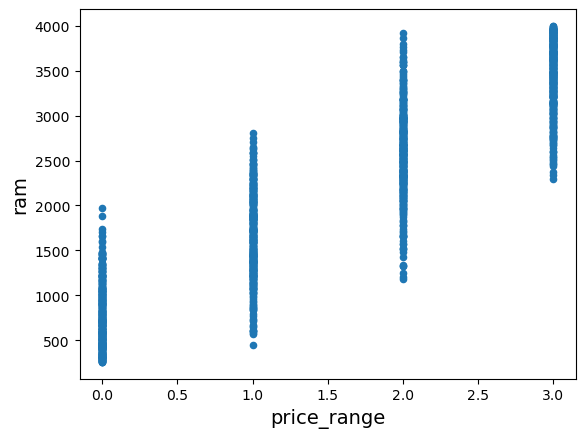

In [27]:
train_data.plot(x='price_range',y='ram',kind='scatter')
plt.show()

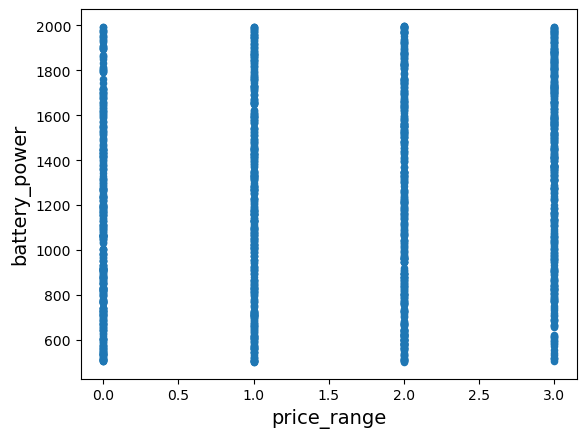

In [28]:
train_data.plot(x='price_range',y='battery_power',kind='scatter')
plt.show()

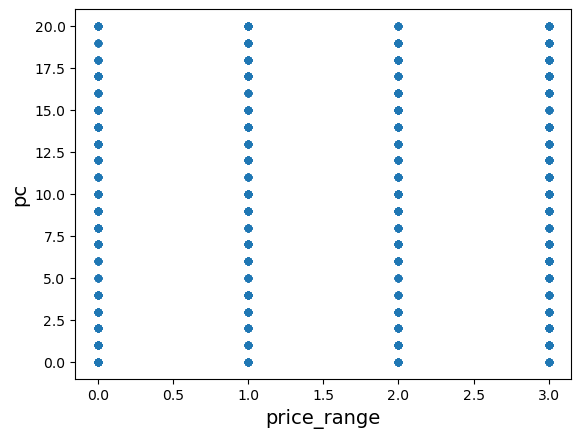

In [29]:
train_data.plot(x='price_range',y='pc',kind='scatter')
plt.show()

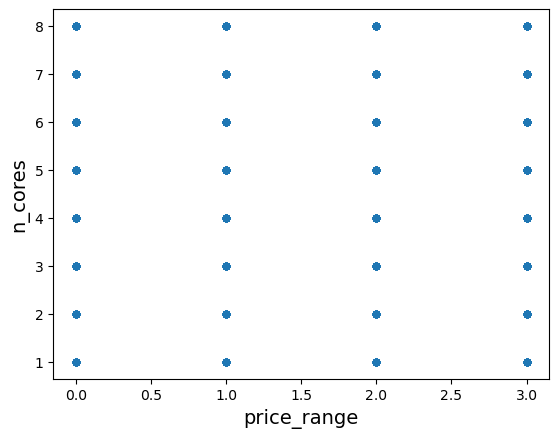

In [30]:
train_data.plot(x='price_range',y='n_cores',kind='scatter')
plt.show()

In [31]:
#heatmap for train_data

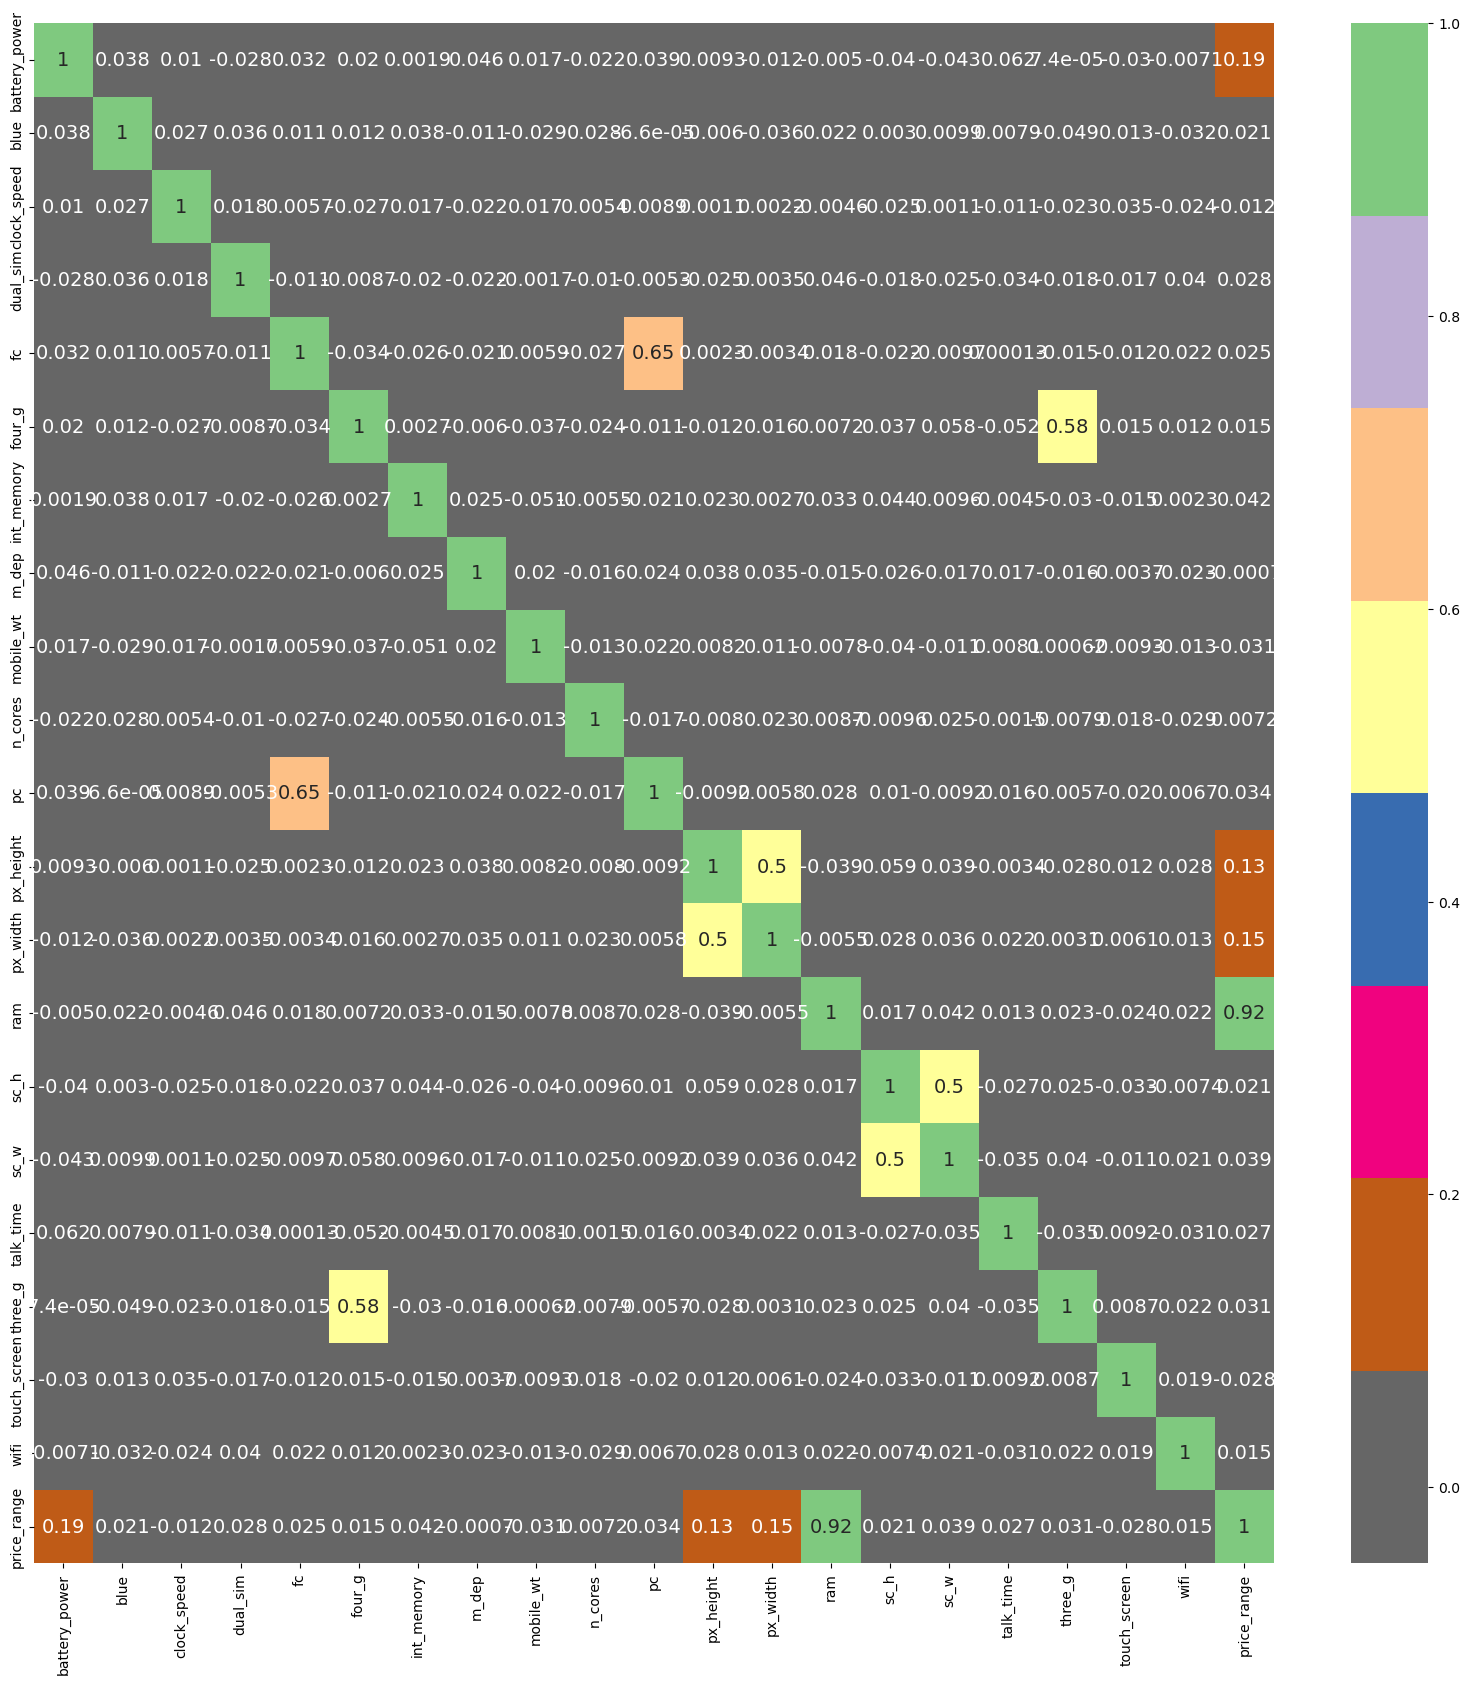

In [32]:
import seaborn as sns
plt.figure(figsize=(20,20))
sns.heatmap(train_data.corr(),annot=True,cmap=plt.cm.Accent_r)
plt.show()

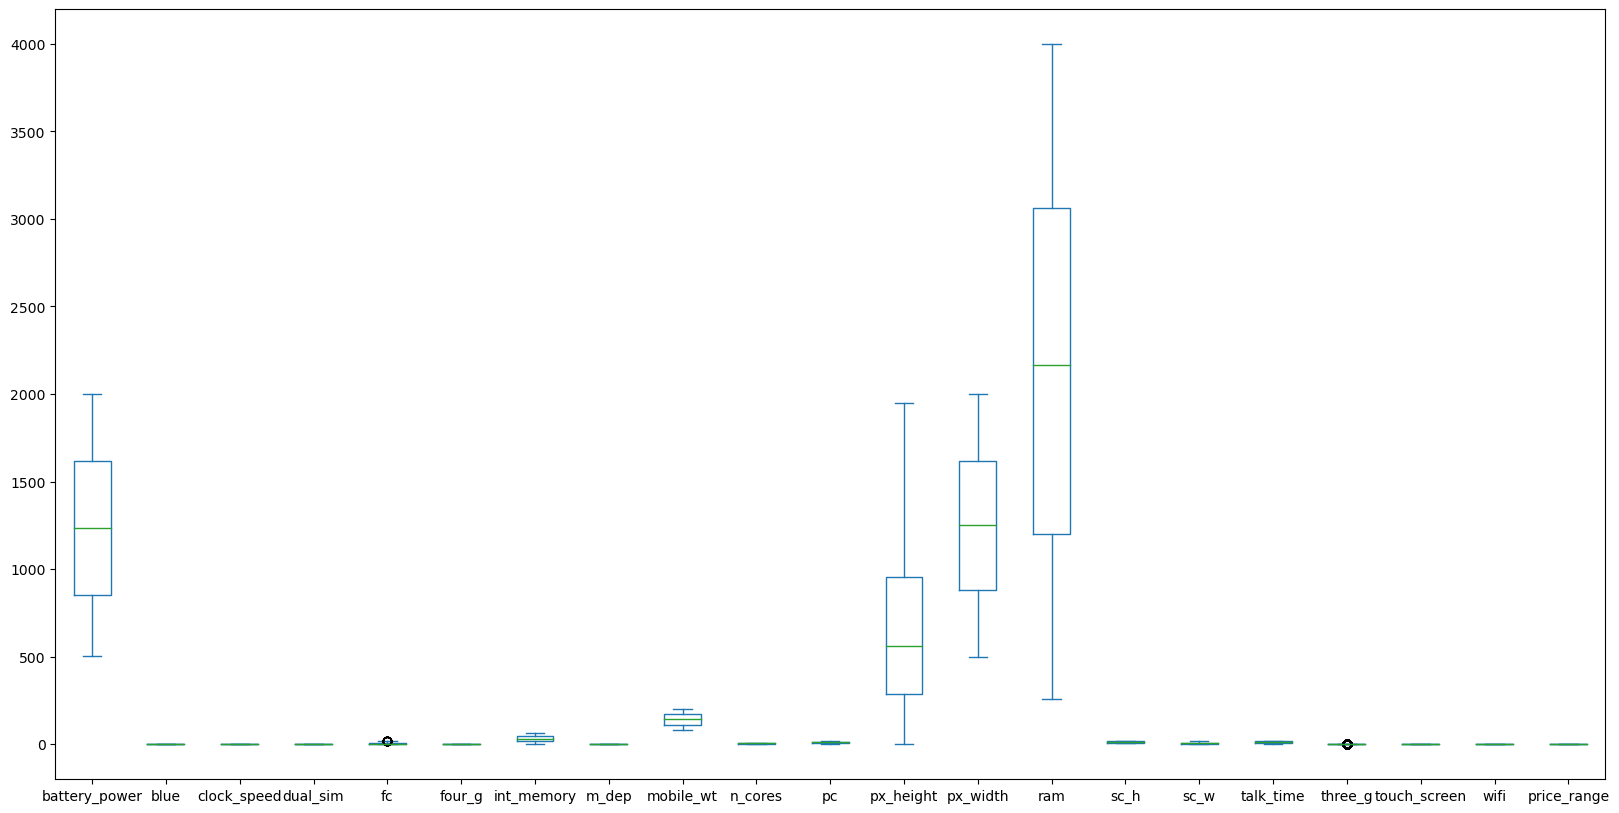

In [33]:
train_data.plot(kind='box',figsize=(20,10))
plt.show()

In [91]:
# Now we will remove the data points with missing data

train_data_f = train_data[train_data['sc_w'] != 0]
train_data_f.shape

(1455, 21)

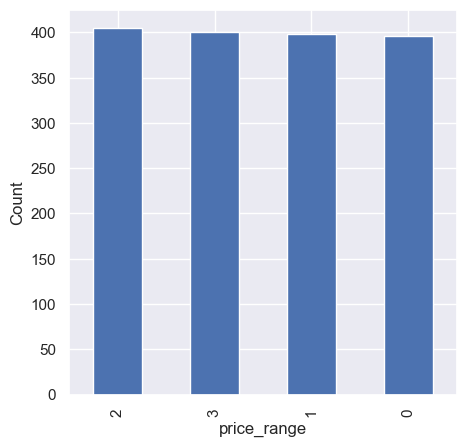

In [84]:
#to check the number of price range
sns.set()
price_plot=train_data['price_range'].value_counts().plot(kind='bar')
plt.xlabel('price_range')
plt.ylabel('Count')
plt.show()

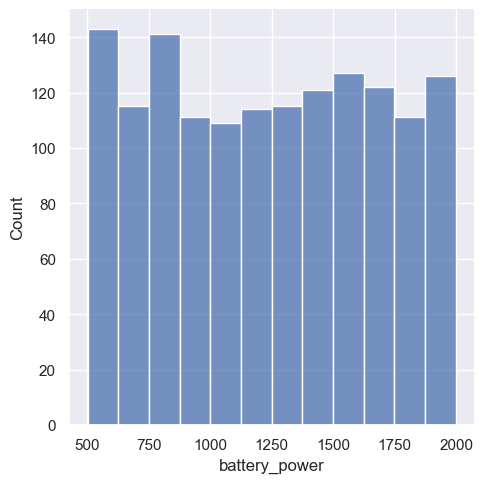

In [85]:
## Data Distribution

#battery power distribution

sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(data=train_data_f["battery_power"])
plt.show()

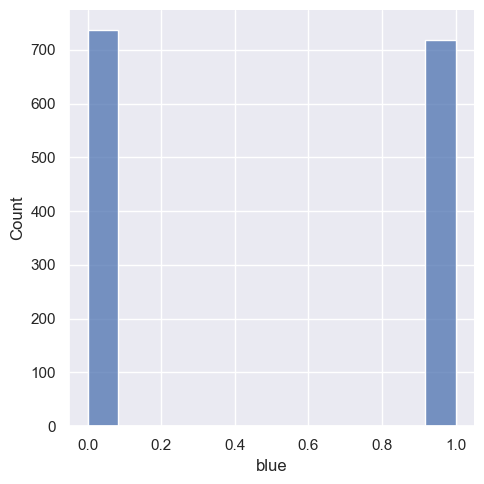

In [86]:
# How many devices have bluetooth or not

sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(data=train_data_f["blue"])
plt.show()

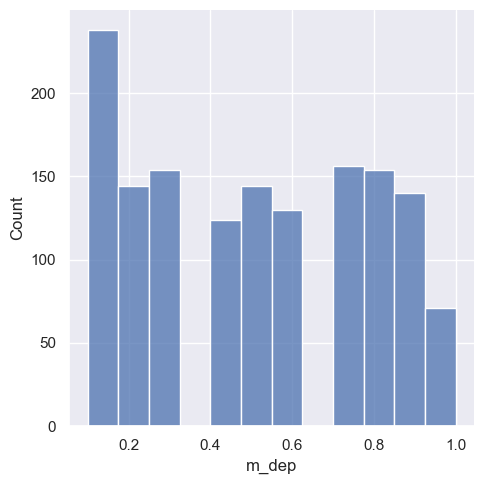

In [87]:
# Now we will see the mobile_depth
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(data=train_data_f["m_dep"])
plt.show()

In [88]:
X = train_data.drop('price_range',axis=1)
y = train_data['price_range']

In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.1,random_state=101)


In [108]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
test_data = sc.transform(test_data)  # Assuming test_data is defined correctly



C:\Users\RSCOMBD-01814652488\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\RSCOMBD-01814652488\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- price_range
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


ValueError: X has 21 features, but StandardScaler is expecting 20 features as input.

In [42]:
X_train

array([[ 0.20129142,  1.03465144,  1.82393118, ...,  0.56691779,
        -1.02890972, -1.01188437],
       [-1.68183966, -0.96650907, -0.87303348, ...,  0.56691779,
        -1.02890972, -1.01188437],
       [-1.18999406, -0.96650907,  1.45616327, ...,  0.56691779,
        -1.02890972, -1.01188437],
       ...,
       [-0.32698719, -0.96650907, -0.62785487, ..., -1.7639242 ,
         0.97190256,  0.98825521],
       [ 0.91173506, -0.96650907, -0.13749766, ...,  0.56691779,
        -1.02890972,  0.98825521],
       [ 0.1899061 ,  1.03465144,  0.35285955, ...,  0.56691779,
         0.97190256,  0.98825521]])

In [43]:
X_test

array([[-0.37252845, -0.96650907, -0.62785487, ...,  0.56691779,
         0.97190256,  0.98825521],
       [ 0.19218316, -0.96650907, -1.24080138, ...,  0.56691779,
        -1.02890972,  0.98825521],
       [-0.92813181, -0.96650907,  0.59803815, ...,  0.56691779,
        -1.02890972, -1.01188437],
       ...,
       [-0.89853   , -0.96650907,  0.35285955, ...,  0.56691779,
        -1.02890972, -1.01188437],
       [ 1.55158976,  1.03465144,  0.35285955, ...,  0.56691779,
         0.97190256,  0.98825521],
       [ 0.2331703 ,  1.03465144,  0.84321676, ...,  0.56691779,
        -1.02890972,  0.98825521]])

In [44]:
#Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train , Y_train)

DecisionTreeClassifier()

In [45]:
pred = dtc.predict(X_test)
pred


array([0, 2, 3, 1, 1, 2, 2, 3, 3, 3, 1, 1, 0, 1, 2, 0, 3, 0, 3, 0, 1, 2,
       2, 3, 3, 1, 3, 3, 3, 1, 2, 0, 1, 2, 2, 2, 1, 0, 0, 1, 3, 1, 3, 1,
       2, 0, 3, 0, 3, 3, 0, 2, 1, 1, 1, 2, 0, 1, 1, 0, 2, 1, 3, 0, 2, 1,
       1, 2, 0, 1, 2, 2, 1, 1, 1, 0, 3, 2, 1, 1, 1, 2, 0, 0, 0, 1, 2, 2,
       0, 1, 1, 2, 2, 2, 2, 1, 1, 2, 3, 2, 1, 1, 0, 1, 3, 2, 0, 2, 2, 3,
       2, 1, 1, 3, 1, 1, 2, 3, 1, 2, 3, 1, 2, 1, 3, 0, 2, 1, 1, 3, 3, 0,
       2, 0, 3, 3, 2, 0, 0, 3, 3, 0, 1, 0, 0, 3, 1, 1, 0, 0, 1, 2, 2, 1,
       3, 1, 1, 0, 3, 2], dtype=int64)

In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix
dtc_acc = accuracy_score(pred,Y_test)
print("DTC Accuracy is: ",dtc_acc)
print(confusion_matrix(pred,Y_test))

DTC Accuracy is:  0.78125
[[30  3  0  0]
 [ 2 41  9  0]
 [ 0  5 29  7]
 [ 0  0  9 25]]


In [47]:
#K Neighbors Classifier

In [48]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train , Y_train)

KNeighborsClassifier()

In [49]:
pred = knn.predict(X_test)
pred

C:\Users\RSCOMBD-01814652488\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([0, 1, 3, 0, 2, 1, 2, 1, 3, 3, 0, 1, 0, 3, 1, 0, 3, 1, 2, 0, 0, 1,
       2, 2, 3, 0, 2, 2, 3, 0, 2, 0, 1, 0, 1, 3, 0, 1, 0, 2, 2, 0, 3, 3,
       3, 0, 3, 0, 3, 3, 0, 1, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 3, 0, 3, 0,
       0, 2, 1, 1, 1, 1, 2, 0, 0, 0, 3, 1, 1, 1, 2, 3, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 2, 1, 1, 1, 2, 3, 2, 0, 0, 1, 0, 0, 2, 0, 1, 0, 3,
       1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 3, 1, 1, 3, 0, 2, 0, 1, 3, 3, 0,
       3, 0, 2, 3, 1, 0, 0, 3, 2, 1, 1, 0, 0, 3, 0, 2, 0, 1, 0, 2, 0, 1,
       0, 1, 2, 0, 3, 2], dtype=int64)

In [50]:
from sklearn.metrics import accuracy_score, confusion_matrix
knn_acc = accuracy_score(pred,Y_test)
print("KNN Accuracy is: ",knn_acc)
print(confusion_matrix(pred,Y_test))

KNN Accuracy is:  0.48125
[[24 20  7  0]
 [ 7 17 18  3]
 [ 1  9 16  9]
 [ 0  3  6 20]]


In [51]:
#Random Forest Classifier

In [105]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train , Y_train)

RandomForestClassifier()

In [106]:
pred = rfc.predict(X_test)
pred

array([3, 2, 2, 1, 1, 3, 0, 2, 2, 1, 3, 1, 0, 2, 0, 2, 2, 3, 2, 1, 1, 1,
       0, 3, 2, 1, 1, 1, 3, 1, 0, 1, 0, 2, 3, 1, 3, 3, 2, 0, 1, 1, 0, 3,
       3, 2, 1, 1, 0, 1, 2, 3, 0, 2, 0, 3, 1, 1, 3, 1, 3, 2, 1, 1, 2, 0,
       1, 2, 3, 0, 0, 3, 2, 3, 2, 0, 0, 1, 2, 0, 1, 1, 0, 0, 0, 2, 3, 3,
       0, 1, 3, 1, 1, 2, 2, 0, 2, 3, 1, 0, 2, 1, 3, 1, 1, 0, 0, 3, 2, 0,
       1, 3, 2, 1, 3, 2, 1, 2, 1, 3, 2, 2, 2, 1, 3, 0, 3, 3, 1, 3, 0, 2,
       2, 2, 0, 0, 0, 2, 1, 2, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 3, 1, 2,
       1, 0, 0, 3, 1, 2], dtype=int64)

In [54]:
from sklearn.metrics import accuracy_score, confusion_matrix
rfc_acc = accuracy_score(pred,Y_test)
print("RFC Accuracy is: ",rfc_acc)
print(confusion_matrix(pred,Y_test))

RFC Accuracy is:  0.875
[[32  2  0  0]
 [ 0 45  5  0]
 [ 0  2 35  4]
 [ 0  0  7 28]]


In [55]:
#Support Vector Classifier

In [98]:
from sklearn.svm import SVC
knn=SVC()
knn.fit(X_train,Y_train)

SVC()

In [57]:
pred1 = knn.predict(X_test)
pred1

array([0, 1, 3, 1, 2, 2, 2, 2, 3, 3, 0, 1, 0, 1, 2, 0, 3, 0, 2, 0, 2, 2,
       2, 3, 3, 1, 2, 3, 3, 1, 1, 1, 2, 2, 2, 3, 1, 0, 0, 1, 2, 1, 3, 2,
       2, 0, 2, 0, 3, 3, 0, 3, 2, 1, 1, 2, 0, 1, 2, 0, 2, 1, 3, 0, 3, 1,
       1, 2, 0, 1, 3, 1, 1, 1, 2, 0, 3, 2, 1, 1, 1, 2, 0, 1, 0, 1, 2, 1,
       0, 1, 1, 2, 1, 3, 2, 1, 1, 2, 3, 2, 1, 2, 0, 1, 2, 2, 1, 3, 2, 3,
       2, 1, 1, 3, 1, 1, 2, 3, 1, 2, 3, 1, 2, 2, 3, 0, 3, 1, 1, 3, 3, 0,
       2, 0, 3, 3, 2, 0, 0, 3, 3, 0, 2, 0, 0, 3, 0, 2, 0, 1, 1, 2, 1, 1,
       2, 1, 1, 0, 3, 2], dtype=int64)

In [58]:
from sklearn.metrics import accuracy_score
svc_acc = accuracy_score(pred1,Y_test)
print("SVC Accuracy is: ",svc_acc)
print(confusion_matrix(pred1,Y_test))

SVC Accuracy is:  0.875
[[30  1  0  0]
 [ 2 43  4  0]
 [ 0  5 38  3]
 [ 0  0  5 29]]


In [ ]:
#Ensemble Learning

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


# Create the individual classifiers
dct = DecisionTreeClassifier()
SVC = SVC(probability=True)
knn = KNeighborsClassifier()
rfc = RandomForestClassifier()

# Create the ensemble model using VotingClassifier
ensemble = VotingClassifier(estimators=[('dct', dct), ('SVC', SVC),('rfc',rfc), ('knn', knn)], voting='soft')

# Train the ensemble model
ensemble.fit(X_train, Y_train)

# Make predictions on the test set
y_pred = ensemble.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(Y_test, y_pred)
print("Ensemble Learning Accuracy is:", accuracy)


Ensemble Learning Accuracy is: 0.84375


In [76]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        32
           1       0.90      0.92      0.91        49
           2       0.85      0.74      0.80        47
           3       0.80      0.88      0.84        32

    accuracy                           0.88       160
   macro avg       0.87      0.88      0.88       160
weighted avg       0.87      0.88      0.87       160



In [77]:
# Model Performance Graph

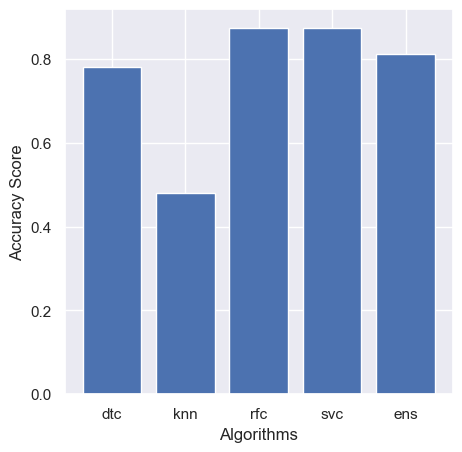

In [78]:
plt.bar(x=['dtc','knn','rfc','svc','ens'],height=[dtc_acc,knn_acc,rfc_acc,svc_acc,accuracy])
plt.xlabel("Algorithms")
plt.ylabel("Accuracy Score")
plt.show()